## Final Project Submission

Please fill out:
* Student name: James Brochhausen
* Student pace: part time 
* Scheduled project review date/time:  Aug 11th, 2020 6PM EST
* Instructor name: James Irving

### Intro

Throughout the below project we'll clean, explore, and model a dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. We will view, interpret and create a regression model with the information to help home owners interpret how they can increase / invest in their property value. as we make our way through the analysis we'll find the bathrooms, zip codes and grade of a home are some of the most important values when it comes to pricing within this given dataset.

In [1]:
#putting all my packages in
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import style
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
style.use('ggplot')

# Your code here - remember to use markdown cells for comments as well!

In [2]:
from matplotlib.ticker import FuncFormatter

def reformat_large_tick_values(tick_val, pos):
    """
    Source = https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [3]:
#showing all column names and displaying the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning Data

In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
# Converted date from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1)
memory usage: 3.3+ MB


In [9]:
#There are '?' in sqft_basement I need to get rid of or replace with 0, exploring the data futher
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2500.0        1
295.0         1
2360.0        1
266.0         1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
# '?' only represents ~2% of the data, so I'm going to remove all the rows which have a '?'
df = df[df.sqft_basement !='?']

In [11]:
#converting string to float for sqft_basement column so I can work with the data
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10)
memory usage: 3.4 MB


### Dealing with Null Values

In [12]:
#identifying null values

df.isnull().sum() / len(df)

# Can't remove the waterfront or yr_renovated rows because it's >18% of the data.

#Just fill with the most frequent, so maybe fill with just 0's for Nulls

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110628
view             0.002885
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177553
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [13]:
#got rid of null values in view
df = df.dropna(axis=0, subset=['view'])
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Replacing Null values with the common number in waterfron and yr_renovatd
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dealing with outliers

## Visuals

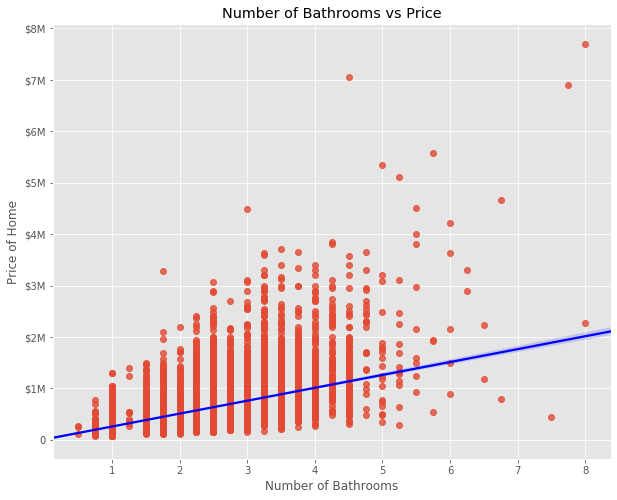

In [16]:


plt.figure(figsize=(10,8))
sns.regplot(x="bathrooms", y="price", data=df, line_kws = {'color': 'blue'})
ax = plt.gca()
ax.set_title('Number of Bathrooms vs Price')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Price of Home')
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

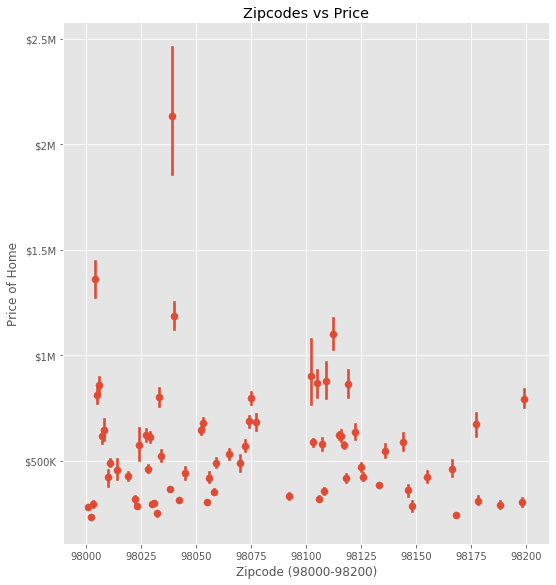

In [17]:
# fig, ax = plt.subplots(figsize=(20,20))

sns.lmplot(x="zipcode", y="price", data=df, x_estimator=np.mean, fit_reg = False, size = 8)
ax = plt.gca()
ax.set_title('Zipcodes vs Price')
ax.set_xlabel('Zipcode (98000-98200)')
ax.set_ylabel('Price of Home')
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

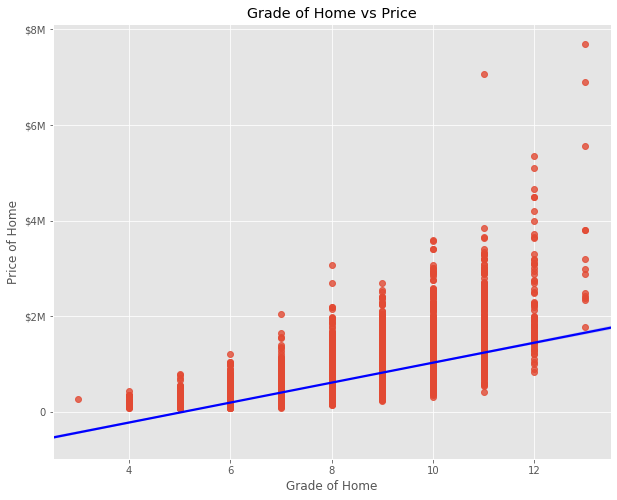

In [18]:
plt.figure(figsize=(10,8))
sns.regplot(x="grade", y="price", data=df, line_kws = {'color': 'blue'})
ax = plt.gca()
ax.set_title('Grade of Home vs Price')
ax.set_xlabel('Grade of Home')
ax.set_ylabel('Price of Home')
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

#If you have a Grade <10 You should expect the value of your home to drop minimum by
#$16,110

#### Removing outliers using z-score in numerical data

#### Categorical and Numerical Data Frames

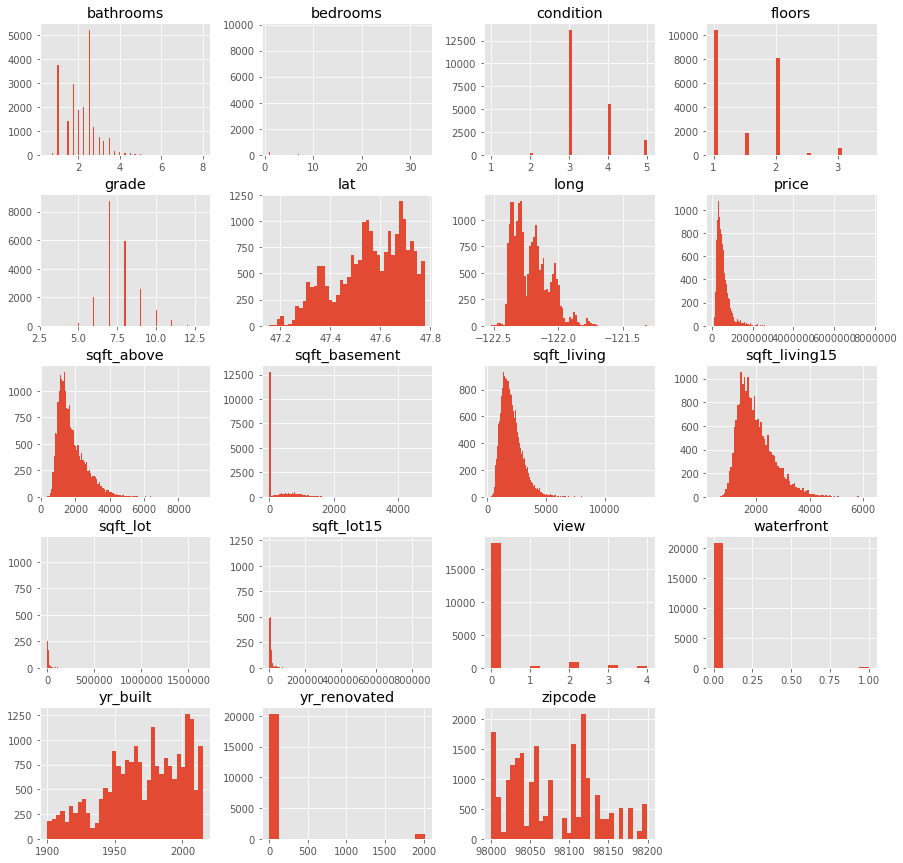

In [19]:
df.hist(bins='auto', figsize = (15,15));

In [20]:
# # creating categorical df
df_cat = df[['yr_renovated','waterfront','view','condition','grade']].copy()
df_cat.head()

# #Take a look at bathrooms as maybe moving to numerical
#Take a look at dtypes to look at data further, by splitting up data

,yr_renovated,waterfront,view,condition,grade
0,0.0,0.0,0.0,3,7
1,1991.0,0.0,0.0,3,7
2,0.0,0.0,0.0,3,6
3,0.0,0.0,0.0,5,7
4,0.0,0.0,0.0,3,8


In [21]:
# creating numerical df
df_num = df[['price', 'zipcode', 'yr_built','bedrooms','floors','sqft_living','sqft_lot',
             'bathrooms','sqft_above',
             'sqft_basement','sqft_living15','sqft_lot15']].copy()

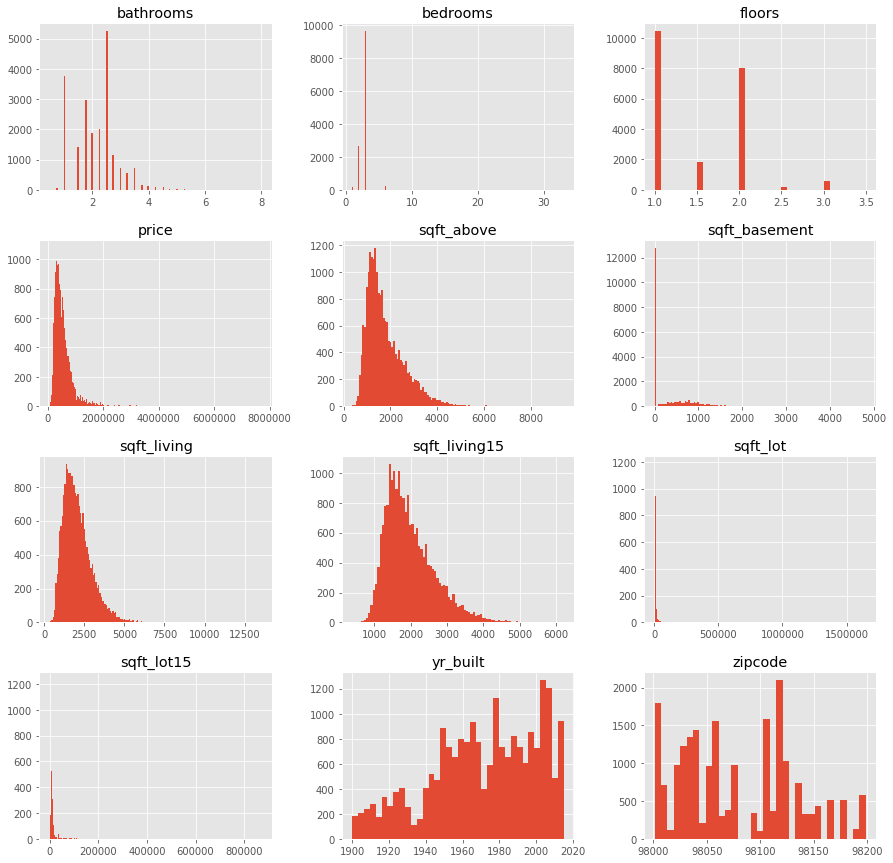

In [22]:
df_num.hist(bins='auto', figsize = (15,15));

In [23]:
#Using Z Score to remove more outliers

z = np.abs(stats.zscore(df_num))
# df_num = df_num[(z < 3).all(axis=1)]
df_num.head()

,price,zipcode,yr_built,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,98178,1955,3,1.0,1180,5650,1.00,1180,0.0,1340,5650
1,538000.0,98125,1951,3,2.0,2570,7242,2.25,2170,400.0,1690,7639
2,180000.0,98028,1933,2,1.0,770,10000,1.00,770,0.0,2720,8062
3,604000.0,98136,1965,4,1.0,1960,5000,3.00,1050,910.0,1360,5000
4,510000.0,98074,1987,3,1.0,1680,8080,2.00,1680,0.0,1800,7503


In [24]:
idx_outlier = (z > 3).any(axis=1)
idx_outlier

array([False, False, False, ..., False, False, False])

In [25]:
idx_outlier.sum()

1321

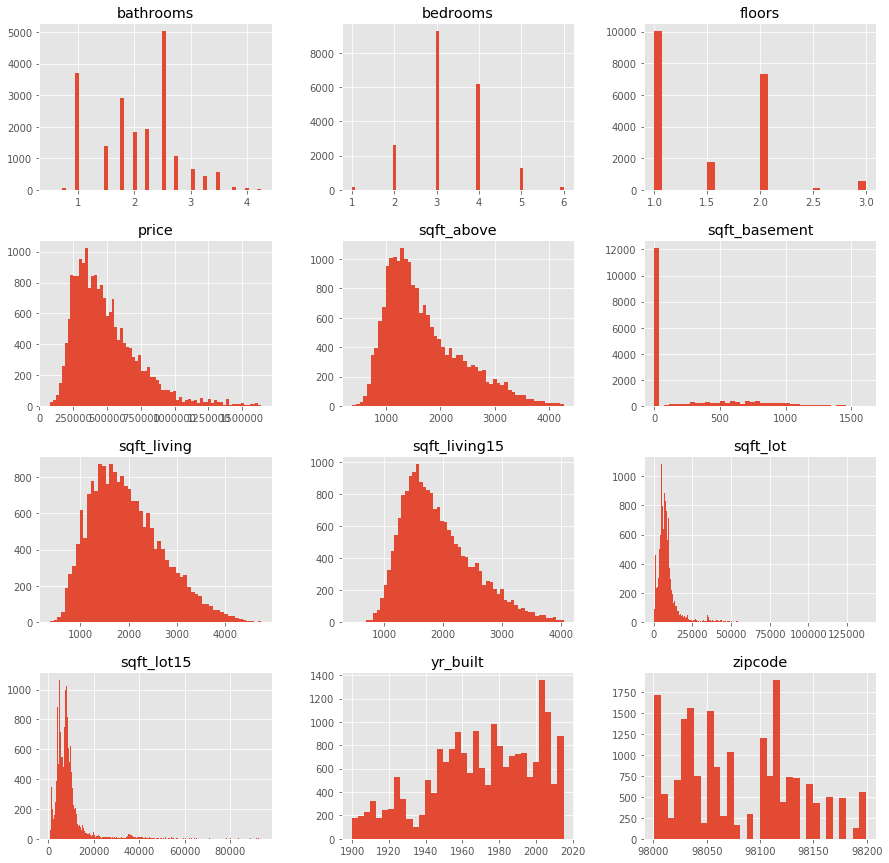

In [26]:
df_num[~idx_outlier].hist(bins='auto', figsize = (15,15));

In [27]:

res = df_num.describe()
res

,price,zipcode,yr_built,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,21082.00000,21082.000000,2.108200e+04,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,98077.858837,1971.023337,3.372403,1.49362,2080.359975,1.507759e+04,2.115916,1789.000000,291.359975,1986.917418,12732.514135
std,3.667323e+05,53.528769,29.323120,0.924996,0.53937,917.856396,4.117338e+04,0.768142,828.369355,442.007858,685.544250,27148.781580
min,7.800000e+04,98001.000000,1900.000000,1.000000,1.00000,370.000000,5.200000e+02,0.500000,370.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,98033.000000,1952.000000,3.000000,1.00000,1430.000000,5.040000e+03,1.750000,1200.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,98065.000000,1975.000000,3.000000,1.50000,1910.000000,7.620000e+03,2.250000,1560.000000,0.000000,1840.000000,7626.000000
75%,6.450000e+05,98117.000000,1997.000000,4.000000,2.00000,2550.000000,1.069775e+04,2.500000,2210.000000,560.000000,2360.000000,10088.750000
max,7.700000e+06,98199.000000,2015.000000,33.000000,3.50000,13540.000000,1.651359e+06,8.000000,9410.000000,4820.000000,6210.000000,871200.000000


In [28]:
# Putting categorical and numerical data frames back together after cleaning

df_clean = pd.concat([df_num, df_cat], axis=1)
df_clean.isna().sum() / len(df_clean)

price            0.0
zipcode          0.0
yr_built         0.0
bedrooms         0.0
floors           0.0
sqft_living      0.0
sqft_lot         0.0
bathrooms        0.0
sqft_above       0.0
sqft_basement    0.0
sqft_living15    0.0
sqft_lot15       0.0
yr_renovated     0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
dtype: float64

In [29]:
#Double checking null values after removing outliers
df_clean = df_clean[~idx_outlier]
df_clean.isna().sum()

price            0
zipcode          0
yr_built         0
bedrooms         0
floors           0
sqft_living      0
sqft_lot         0
bathrooms        0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
yr_renovated     0
waterfront       0
view             0
condition        0
grade            0
dtype: int64

## Exploring Data

In [30]:
df_clean.corr()

,price,zipcode,yr_built,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_renovated,waterfront,view,condition,grade
price,1.000000,-0.011415,0.028723,0.296047,0.269693,0.627265,0.089933,0.453190,0.521709,0.253620,0.556427,0.083954,0.102124,0.094519,0.297714,0.048733,0.637631
zipcode,-0.011415,1.000000,-0.342167,-0.159416,-0.058339,-0.194805,-0.180476,-0.202209,-0.265959,0.106401,-0.277381,-0.193889,0.067719,0.044963,0.116153,-0.007151,-0.173564
yr_built,0.028723,-0.342167,1.000000,0.169929,0.500624,0.340448,0.027399,0.540410,0.450850,-0.161098,0.336411,0.047464,-0.195504,-0.035266,-0.077759,-0.356751,0.467594
bedrooms,0.296047,-0.159416,0.169929,1.000000,0.167141,0.604325,0.094323,0.495120,0.483833,0.277830,0.392800,0.094119,0.003632,-0.033304,0.037719,0.024809,0.338193
floors,0.269693,-0.058339,0.500624,0.167141,1.000000,0.356902,-0.099807,0.513959,0.539663,-0.288288,0.270170,-0.103893,-0.000914,-0.003445,0.001344,-0.269950,0.463816
sqft_living,0.627265,-0.194805,0.340448,0.604325,0.356902,1.000000,0.216256,0.714395,0.852820,0.366734,0.739006,0.218117,0.032538,0.009859,0.183289,-0.065406,0.712926
sqft_lot,0.089933,-0.180476,0.027399,0.094323,-0.099807,0.216256,1.000000,0.053791,0.206389,0.040182,0.255668,0.815320,0.013725,0.053786,0.058324,0.036053,0.126979
bathrooms,0.453190,-0.202209,0.540410,0.495120,0.513959,0.714395,0.053791,1.000000,0.631830,0.221766,0.528609,0.057788,0.031413,-0.002869,0.105515,-0.133241,0.620138
sqft_above,0.521709,-0.265959,0.450850,0.483833,0.539663,0.852820,0.206389,0.631830,1.000000,-0.173062,0.713639,0.213686,0.004231,-0.006002,0.077072,-0.170366,0.709318
sqft_basement,0.253620,0.106401,-0.161098,0.277830,-0.288288,0.366734,0.040182,0.221766,-0.173062,1.000000,0.122439,0.030694,0.053830,0.029288,0.208388,0.180153,0.080950


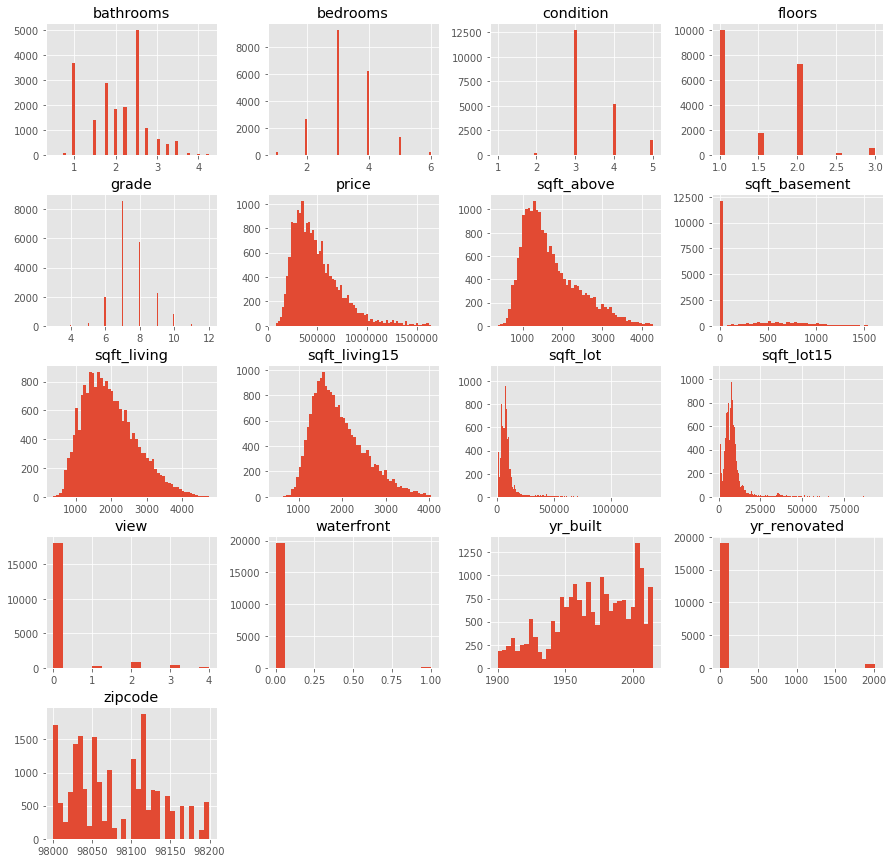

In [31]:
df_clean.hist(bins = 'auto', figsize = (15,15));

## Modeling Data

In [32]:
feats = ['yr_renovated','waterfront','view','condition','grade','zipcode']

In [33]:
x_cols = ['yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_above',
          'sqft_basement', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'grade', 'view','zipcode']
outcome = 'price'

In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
for col in feats:
    formula = formula.replace(col, 'C({})'.format(col))
formula

'price~yr_built+sqft_living15+sqft_lot15+sqft_above+sqft_basement+sqft_living+bathrooms+bedrooms+floors+C(grade)+C(view)+C(zipcode)'

In [35]:
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
#Don't scale the ones you want to treat as categories before doing the formula

model = ols(formula=formula, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1070.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:04:56   Log-Likelihood:            -2.5574e+05
No. Observations:               19761   AIC:                         5.117e+05
Df Residuals:                   19670   BIC:                         5.124e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.705e+06   1.27e+05     13.409      0.000    1.46e+06    1.95e+06
C(grade)[T.4]        -1.59e+05   1.03e+05     -1.538      0.124   -3.62e+05    4.37e+04
C(grade)[T.5]       -1.753e+05   1.02e+05     -1.723      0.085   -3.75e+05    2.41e+04
C(grade)[T.6]       -1.635e+05   1.02e+05     -1.610      0.107   -3.63e+05    3.56e+04
C(grade)[T.7]       -1.419e+05   1.02e+05     -1.398      0.162   -3.41e+05    5.71e+04
C(grade)[T.8]       -1.016e+05   1.02e+05     -1.000      0.317   -3.01e+05    9.76e+04
C(grade)[T.9]       -1.611e+04   1.02e+05     -0.159      0.874   -2.15e+05    1.83e+05
C(grade)[T.10]       5.998e+04   1.02e+05      0.590      0.555   -1.39e+05    2.59e+05
C(grade)[T.11]       1.524e+05   1.02e+05      1.493      0.135   -4.76e+04    3.52e+05
C(grade)[T.12]       2.479e+05   1.17e+05      2.111      0.035    1.77e+04    4.78e+05
C(view)[T.1.0]       7.215e+04   6188.246     11.659      0.000       6e+04    8.43e+04
C(view)[T.2.0]        7.28e+04   3876.982     18.776      0.000    6.52e+04    8.04e+04
C(view)[T.3.0]       1.381e+05   5593.901     24.685      0.000    1.27e+05    1.49e+05
C(view)[T.4.0]       3.049e+05   8012.349     38.049      0.000    2.89e+05    3.21e+05
C(zipcode)[T.98002]  1.532e+04   9095.904      1.684      0.092   -2509.779    3.31e+04
C(zipcode)[T.98003]  -832.2497   8258.455     -0.101      0.920    -1.7e+04    1.54e+04
C(zipcode)[T.98004]  6.119e+05   8861.061     69.054      0.000    5.95e+05    6.29e+05
C(zipcode)[T.98005]  3.357e+05   1.01e+04     33.290      0.000    3.16e+05    3.56e+05
C(zipcode)[T.98006]  2.728e+05   7534.906     36.199      0.000    2.58e+05    2.88e+05
C(zipcode)[T.98007]  2.554e+05   1.04e+04     24.627      0.000    2.35e+05    2.76e+05
C(zipcode)[T.98008]  2.477e+05   8286.760     29.891      0.000    2.31e+05    2.64e+05
C(zipcode)[T.98010]  8.679e+04   1.27e+04      6.854      0.000     6.2e+04    1.12e+05
C(zipcode)[T.98011]  1.373e+05   9211.141     14.907      0.000    1.19e+05    1.55e+05
C(zipcode)[T.98014]  9.902e+04   1.21e+04      8.159      0.000    7.52e+04    1.23e+05
C(zipcode)[T.98019]  9.474e+04   9639.299      9.829      0.000    7.58e+04    1.14e+05
C(zipcode)[T.98022]  4255.4584   9383.378      0.454      0.650   -1.41e+04    2.26e+04
C(zipcode)[T.98023] -2.324e+04   7161.013     -3.245      0.001   -3.73e+04   -9199.044
C(zipcode)[T.98024]  1.371e+05   1.58e+04      8.664      0.000    1.06e+05    1.68e+05
C(zipcode)[T.98027]   1.92e+05   7786.668     24.657      0.000    1.77e+05    2.07e+05
C(zipcode)[T.98028]  1.343e+05   8234.725     16.308      0.000    1.18e+05     1.5e+05
C(zipcode)[T.98029]  2.231e+05   8072.422     27.637      0.000    2.07e+05    2.39e+05
C(zipcode)[T.98030]  6196.9526   8433.555      0.735      0.462   -1.03e+04    2.27e+04
C(z

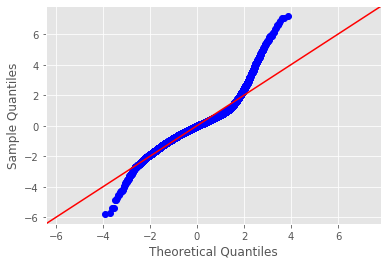

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [37]:
# Removing outliers
# OR Logtransformation, but be careful on how it impacts your coefficients
# look at P-Value <.05
# Get R-Squared closered to .8

# Define the problem
# outcome = 'price'
# x_cols = ['yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_above',
#           'sqft_basement', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'grade', 'view']
# for col in x_cols:
#     df_clean[col] = (df_clean[col] - df_clean[col].mean())/df_clean[col].std()
# df_clean.head()

### Homoscedasticity

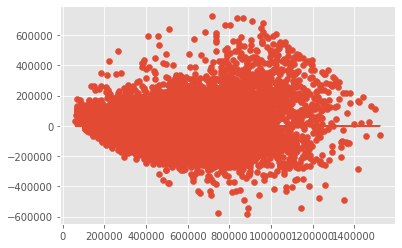

In [38]:
plt.scatter(model.predict(df_clean[x_cols]), model.resid)
plt.plot(model.predict(df_clean[x_cols]), [0 for i in range(len(df_clean))])
# Further work with outliers could be warranted.
# Take a look at the outliers in the columns before hand

In [39]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df_clean['price'].quantile(q=q)))

0.9 percentile: 812000.0
0.91 percentile: 834890.0000000003
0.92 percentile: 855000.0
0.93 percentile: 885000.0
0.94 percentile: 915000.0
0.95 percentile: 952000.0
0.96 percentile: 1000000.0
0.97 percentile: 1090000.0
0.98 percentile: 1210000.0


In [40]:
# Cleaning more of the data to remove some of the outliers here
subset = df_clean[df_clean['price'] < 1000000 ]
print('Percent removed:',(len(df_clean) - len(subset))/len(df_clean))
predictors = '+'.join(x_cols)

formula = outcome + '~' + predictors

for col in feats:
    formula = formula.replace(col, 'C({})'.format(col))
    
formula
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.040483781185162694


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1038.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:04:59   Log-Likelihood:            -2.4086e+05
No. Observations:               18961   AIC:                         4.819e+05
Df Residuals:                   18871   BIC:                         4.826e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.559e+06   1.02e+05     15.331      0.000    1.36e+06    1.76e+06
C(grade)[T.4]       -1.565e+05   8.14e+04     -1.922      0.055   -3.16e+05    3084.039
C(grade)[T.5]       -1.643e+05   8.01e+04     -2.050      0.040   -3.21e+05   -7215.314
C(grade)[T.6]       -1.478e+05      8e+04     -1.848      0.065   -3.05e+05    8960.600
C(grade)[T.7]       -1.177e+05      8e+04     -1.472      0.141   -2.74e+05    3.91e+04
C(grade)[T.8]       -7.787e+04      8e+04     -0.973      0.330   -2.35e+05     7.9e+04
C(grade)[T.9]       -1.605e+04   8.01e+04     -0.200      0.841   -1.73e+05    1.41e+05
C(grade)[T.10]       1.772e+04   8.01e+04      0.221      0.825   -1.39e+05    1.75e+05
C(grade)[T.11]       7.561e+04   8.07e+04      0.937      0.349   -8.26e+04    2.34e+05
C(view)[T.1.0]       5.507e+04   5274.151     10.442      0.000    4.47e+04    6.54e+04
C(view)[T.2.0]       5.636e+04   3253.021     17.324      0.000       5e+04    6.27e+04
C(view)[T.3.0]       7.361e+04   5060.830     14.545      0.000    6.37e+04    8.35e+04
C(view)[T.4.0]       2.012e+05   7838.280     25.672      0.000    1.86e+05    2.17e+05
C(zipcode)[T.98002]  1.119e+04   7165.352      1.562      0.118   -2850.264    2.52e+04
C(zipcode)[T.98003]    74.1192   6505.627      0.011      0.991   -1.27e+04    1.28e+04
C(zipcode)[T.98004]  4.909e+05   8220.638     59.721      0.000    4.75e+05    5.07e+05
C(zipcode)[T.98005]  3.301e+05   8187.464     40.313      0.000    3.14e+05    3.46e+05
C(zipcode)[T.98006]  2.719e+05   6096.882     44.591      0.000     2.6e+05    2.84e+05
C(zipcode)[T.98007]   2.53e+05   8283.101     30.550      0.000    2.37e+05    2.69e+05
C(zipcode)[T.98008]  2.408e+05   6598.531     36.491      0.000    2.28e+05    2.54e+05
C(zipcode)[T.98010]  9.164e+04   9975.117      9.187      0.000    7.21e+04    1.11e+05
C(zipcode)[T.98011]  1.422e+05   7269.522     19.565      0.000    1.28e+05    1.56e+05
C(zipcode)[T.98014]  1.064e+05   9562.533     11.128      0.000    8.77e+04    1.25e+05
C(zipcode)[T.98019]  9.618e+04   7593.388     12.666      0.000    8.13e+04    1.11e+05
C(zipcode)[T.98022]  7062.6559   7393.135      0.955      0.339   -7428.551    2.16e+04
C(zipcode)[T.98023] -2.012e+04   5641.391     -3.567      0.000   -3.12e+04   -9066.772
C(zipcode)[T.98024]  1.367e+05   1.25e+04     10.965      0.000    1.12e+05    1.61e+05
C(zipcode)[T.98027]  2.006e+05   6172.677     32.503      0.000    1.89e+05    2.13e+05
C(zipcode)[T.98028]   1.34e+05   6500.838     20.614      0.000    1.21e+05    1.47e+05
C(zipcode)[T.98029]  2.284e+05   6396.318     35.704      0.000    2.16e+05    2.41e+05
C(zipcode)[T.98030]  5613.6280   6642.796      0.845      0.398   -7406.848    1.86e+04
C(zipcode)[T.98031]   1.82e+04   6533.599      2.786      0.005    5395.484     3.1e+04
C(z

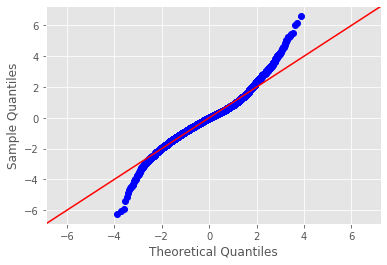

In [41]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

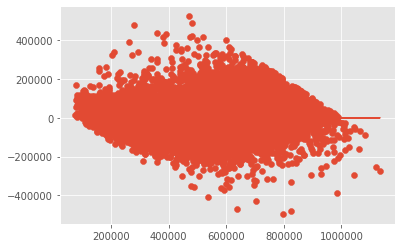

In [42]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

### Conclusion

After concluding we were able to accurately identify how pricing can drastically change from the amount of bathrooms you have, zip codes you live in and the grade of your home. After normalizing, using z-score methods and cleaning our data we came to the following coefficient results. 

Having just one bathroom added or subtracted from your home can change the value of your home by $19,540. 

Having your home be graded below 10 can cost your value of the home by a minimum of $16,050.

Finally whether it be selling or purchasing a home you'd want it to be located in these three zipcodes:
- 98119 ($388.7k)

- 98109 ($387.2k)

- 98112 ($397.5k)

Given the information we discovered we can make recommendations on these crucial categories.